**"Predicting Graduate Admission with Machine Learning: A Comparative Study of Different Algorithms"**

Dataset admission berisi informasi tentang mahasiswa dan peluang mereka untuk diterima di universitas berdasarkan beberapa variabel seperti GRE score, TOEFL score, university rating, dan lain-lain. Dataset ini biasanya digunakan untuk memprediksi peluang seorang mahasiswa diterima di universitas berdasarkan variabel-variabel tersebut.

Tujuan dari model regresi yang dibangun dari dataset ini adalah untuk mengidentifikasi variabel-variabel mana yang paling berpengaruh terhadap peluang seorang mahasiswa diterima di universitas, dan untuk memprediksi peluang diterima dari calon mahasiswa berdasarkan variabel-variabel tersebut. Dengan demikian, universitas dapat menggunakan model ini untuk meningkatkan efisiensi dalam melakukan seleksi mahasiswa dan meningkatkan kualitas siswa yang diterima.





#Import Library

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
import plotly.express as px
import tensorflow as tf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from scipy.stats import spearmanr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings("ignore")

#Data Understanding

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/dentawina/Dataset/main/admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
df.shape

(400, 9)

Dataset ini memiliki 400 baris dan 9 Kolom

In [58]:
df.drop('Serial No.',axis = 1,inplace = True)

Kolom Serial No dihapus karena terlalu unique

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [60]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Persebaran Data cukup Normal, sekilas tidak terlihat ada outlier dari persebarannya

In [61]:
df.isnull().sum().sort_values(ascending = False)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Tidak ada nilai missing value

In [62]:
df.duplicated().sum()

0

Tidak ada duplikat data

#Map Data

In [63]:
df1=df.copy()

In [64]:
# define bin edges
bins = [0, 1.01, 2.01, 3.01, 4.01, np.inf]

# define bin labels
labels = ['Very Poor', 'Poor', 'Medium','Good','Very Good']

# create a new column with binned values
df1['LOR_category'] = pd.cut(df1['LOR '], bins=bins, labels=labels)
df1.drop(['LOR '], axis=1, inplace=True)
# display the resulting dataframe
df1.head()


,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit,LOR_category
0,337,118,4,4.5,9.65,1,0.92,Very Good
1,324,107,4,4.0,8.87,1,0.76,Very Good
2,316,104,3,3.0,8.00,1,0.72,Good
3,322,110,3,3.5,8.67,1,0.80,Medium
4,314,103,2,2.0,8.21,0,0.65,Medium


In [65]:
# define bin edges
bins = [0, 1.01, 2.01, 3.01, 4.01, np.inf]

# define bin labels
labels = ['Very Weak', 'Weak', 'Medium','Good','Very Good']

# create a new column with binned values
df1['SOP_category'] = pd.cut(df1['SOP'], bins=bins, labels=labels)
df1.drop(['SOP'], axis=1, inplace=True)
# display the resulting dataframe
df1.head()


,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit,LOR_category,SOP_category
0,337,118,4,9.65,1,0.92,Very Good,Very Good
1,324,107,4,8.87,1,0.76,Very Good,Good
2,316,104,3,8.00,1,0.72,Good,Medium
3,322,110,3,8.67,1,0.80,Medium,Good
4,314,103,2,8.21,0,0.65,Medium,Weak


In [66]:
label1 = {1: 'Lower Tier', 2: 'Mid Tier',3: 'Moderately Good',4: 'Highly Reputed',5: 'Elite'}
label2 = {1: 'Yes', 0: 'No'}

df1['University Rating'] = df1['University Rating'].map(label1)
df1['Research'] = df1['Research'].map(label2)
#df.drop([''], axis=1, inplace=True)

#EDA

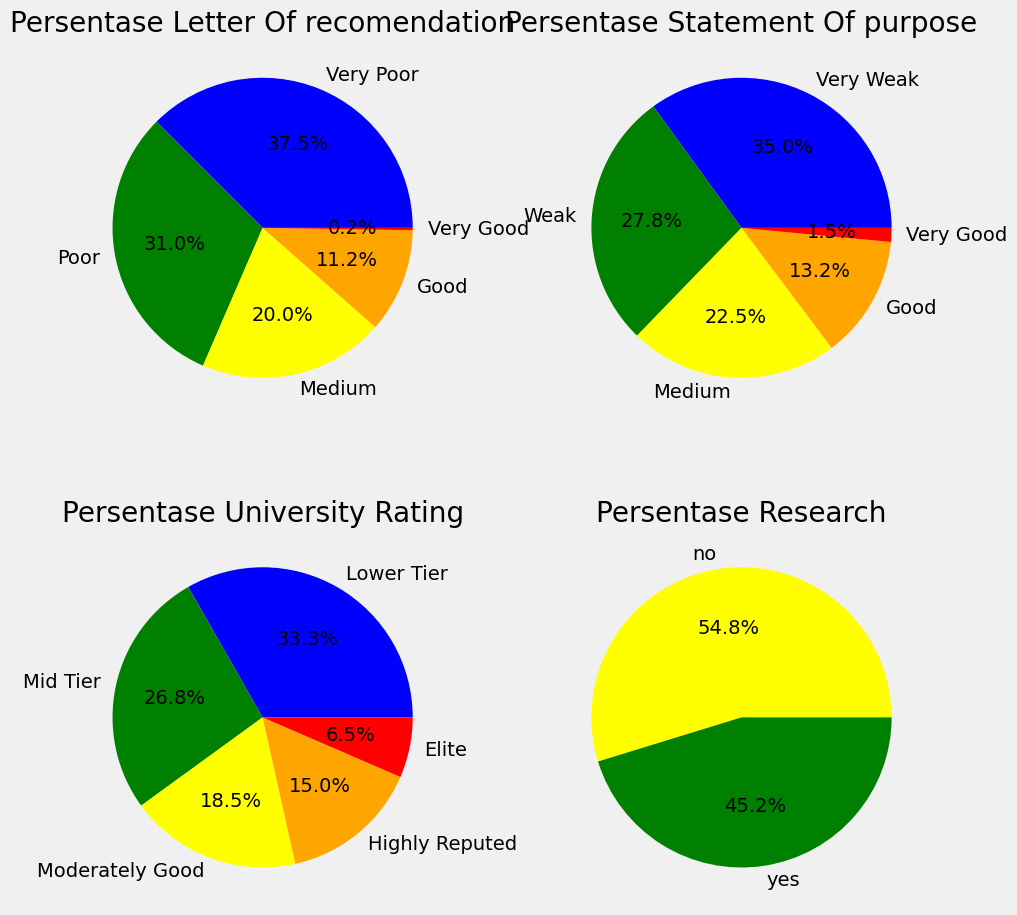

In [67]:
# Plotting four pie charts in one figure using subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.flatten()

# Pie chart 1: clock_speed_category
percent_LOR = df1['LOR_category'].value_counts(normalize=True) * 100
colors = ['blue','green', 'yellow','orange', 'red']
axs[0].pie(percent_LOR.values, labels=['Very Poor', 'Poor', 'Medium','Good','Very Good'],colors=colors, autopct='%1.1f%%')
axs[0].set_title('Persentase Letter Of recomendation')

# Pie chart 2: int_memory_category
percent_SOP = df1['SOP_category'].value_counts(normalize=True) * 100
colors = ['blue','green', 'yellow','orange', 'red']
axs[1].pie(percent_SOP.values, labels=['Very Weak', 'Weak', 'Medium','Good','Very Good'],colors=colors, autopct='%1.1f%%')
axs[1].set_title('Persentase Statement Of purpose')

# Pie chart 3: n_cores_category
percent_rating = df1['University Rating'].value_counts(normalize=True) * 100
colors = ['blue','green', 'yellow','orange', 'red']
axs[2].pie(percent_rating.values, labels=['Lower Tier','Mid Tier', 'Moderately Good', 'Highly Reputed', 'Elite'],colors = colors,autopct='%1.1f%%')
axs[2].set_title('Persentase University Rating')

# Pie chart 4: ram_category
percent_research = df1['Research'].value_counts(normalize=True) * 100
colors = ['yellow', 'green']
axs[3].pie(percent_research.values, labels=['no', 'yes'], colors=colors, autopct='%1.1f%%')
axs[3].set_title('Persentase Research')

# Show the plot
plt.tight_layout()
plt.show()


1. Calon Mahasiswa untuk kategori Letter off recomendation dan statement of purpose didominasi oleh kualitas yang jelek / dibawah rata rata. Calon mahasiswa dengan kualitas letter of recommendation dan statement of purpose yang lebih rendah bisa disebabkan oleh beberapa faktor, seperti kurangnya pengalaman dan kemampuan untuk menulis dokumen tersebut dengan baik, atau kurangnya akses ke sumber daya dan bimbingan yang memadai dalam membuat dokumen tersebut.

2. Presentase rating dari university asal didmonasi oleh univresitas tingkat rendah dan menengah, hanya 6.5 % calon mahasiswa berasal dari univrsitas elit.
Presentase rating dari university asal yang didominasi oleh universitas tingkat rendah dan menengah mungkin dapat disebabkan oleh kurangnya sumber daya dan fasilitas yang tersedia di universitas tersebut, atau kurangnya kesempatan untuk mendapatkan pengalaman dan koneksi yang dapat membantu dalam proses aplikasi.
3. 45,2% Calon mahasiswa sudah melakukan riset dan 54,8% lainnyta belum melakukan riset.
Persentase calon mahasiswa yang telah melakukan riset yang lebih rendah mungkin disebabkan oleh kurangnya pengetahuan tentang pentingnya riset dalam proses aplikasi, atau kurangnya akses ke sumber daya yang memadai untuk melakukan riset tersebut.

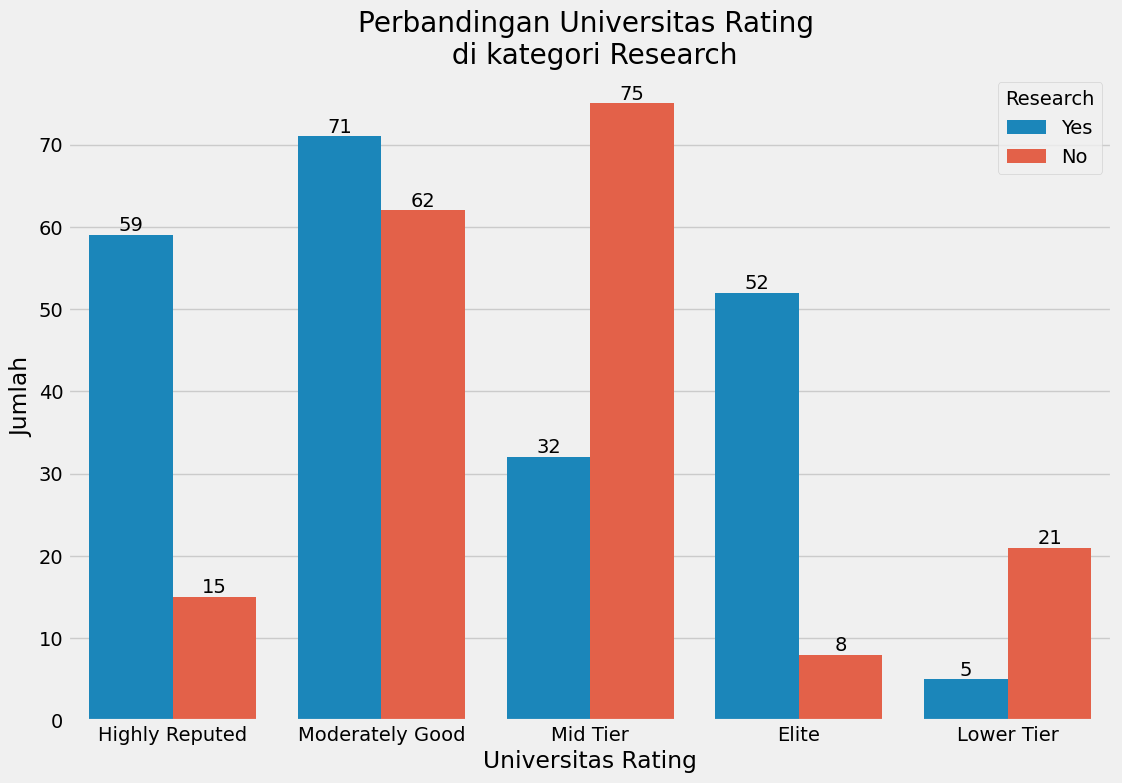

In [68]:
fig, ax = plt.subplots(figsize = (12,8))
_ = sns.countplot(data = df1, x = 'University Rating', hue = 'Research')
_ = ax.set_ylabel('Jumlah')
_ = ax.set_xlabel('Universitas Rating')
_ = ax.set_title('Perbandingan Universitas Rating \n di kategori Research')
for i in ax.containers:
    ax.bar_label(i)

1. Hasil menunjukkan bahwa mayoritas calon mahasiswa yang berasal dari universitas bereputasi tinggi dan elite telah melakukan riset sebelumnya. Hal ini mungkin terjadi karena universitas-universitas tersebut menempatkan riset sebagai salah satu fokus utama dalam aktivitas akademiknya, dan juga dapat menjadi salah satu faktor penting dalam proses seleksi mahasiswa baru.

2. Di sisi lain, hasil menunjukkan bahwa untuk calon mahasiswa yang berasal dari universitas sedang dan cukup baik, cukup berimbang yang pernah melakukan riset atau belum. Hal ini mungkin disebabkan oleh berbagai faktor seperti kurangnya fasilitas riset yang memadai di universitas tersebut, keterbatasan waktu dan sumber daya untuk melakukan riset, atau bahkan faktor personal seperti kurangnya minat atau pengalaman dalam melakukan riset. Namun, adanya calon mahasiswa dari universitas ini yang telah melakukan riset juga menunjukkan adanya minat dan komitmen dari mereka dalam menjalani pendidikan yang lebih berkualitas.

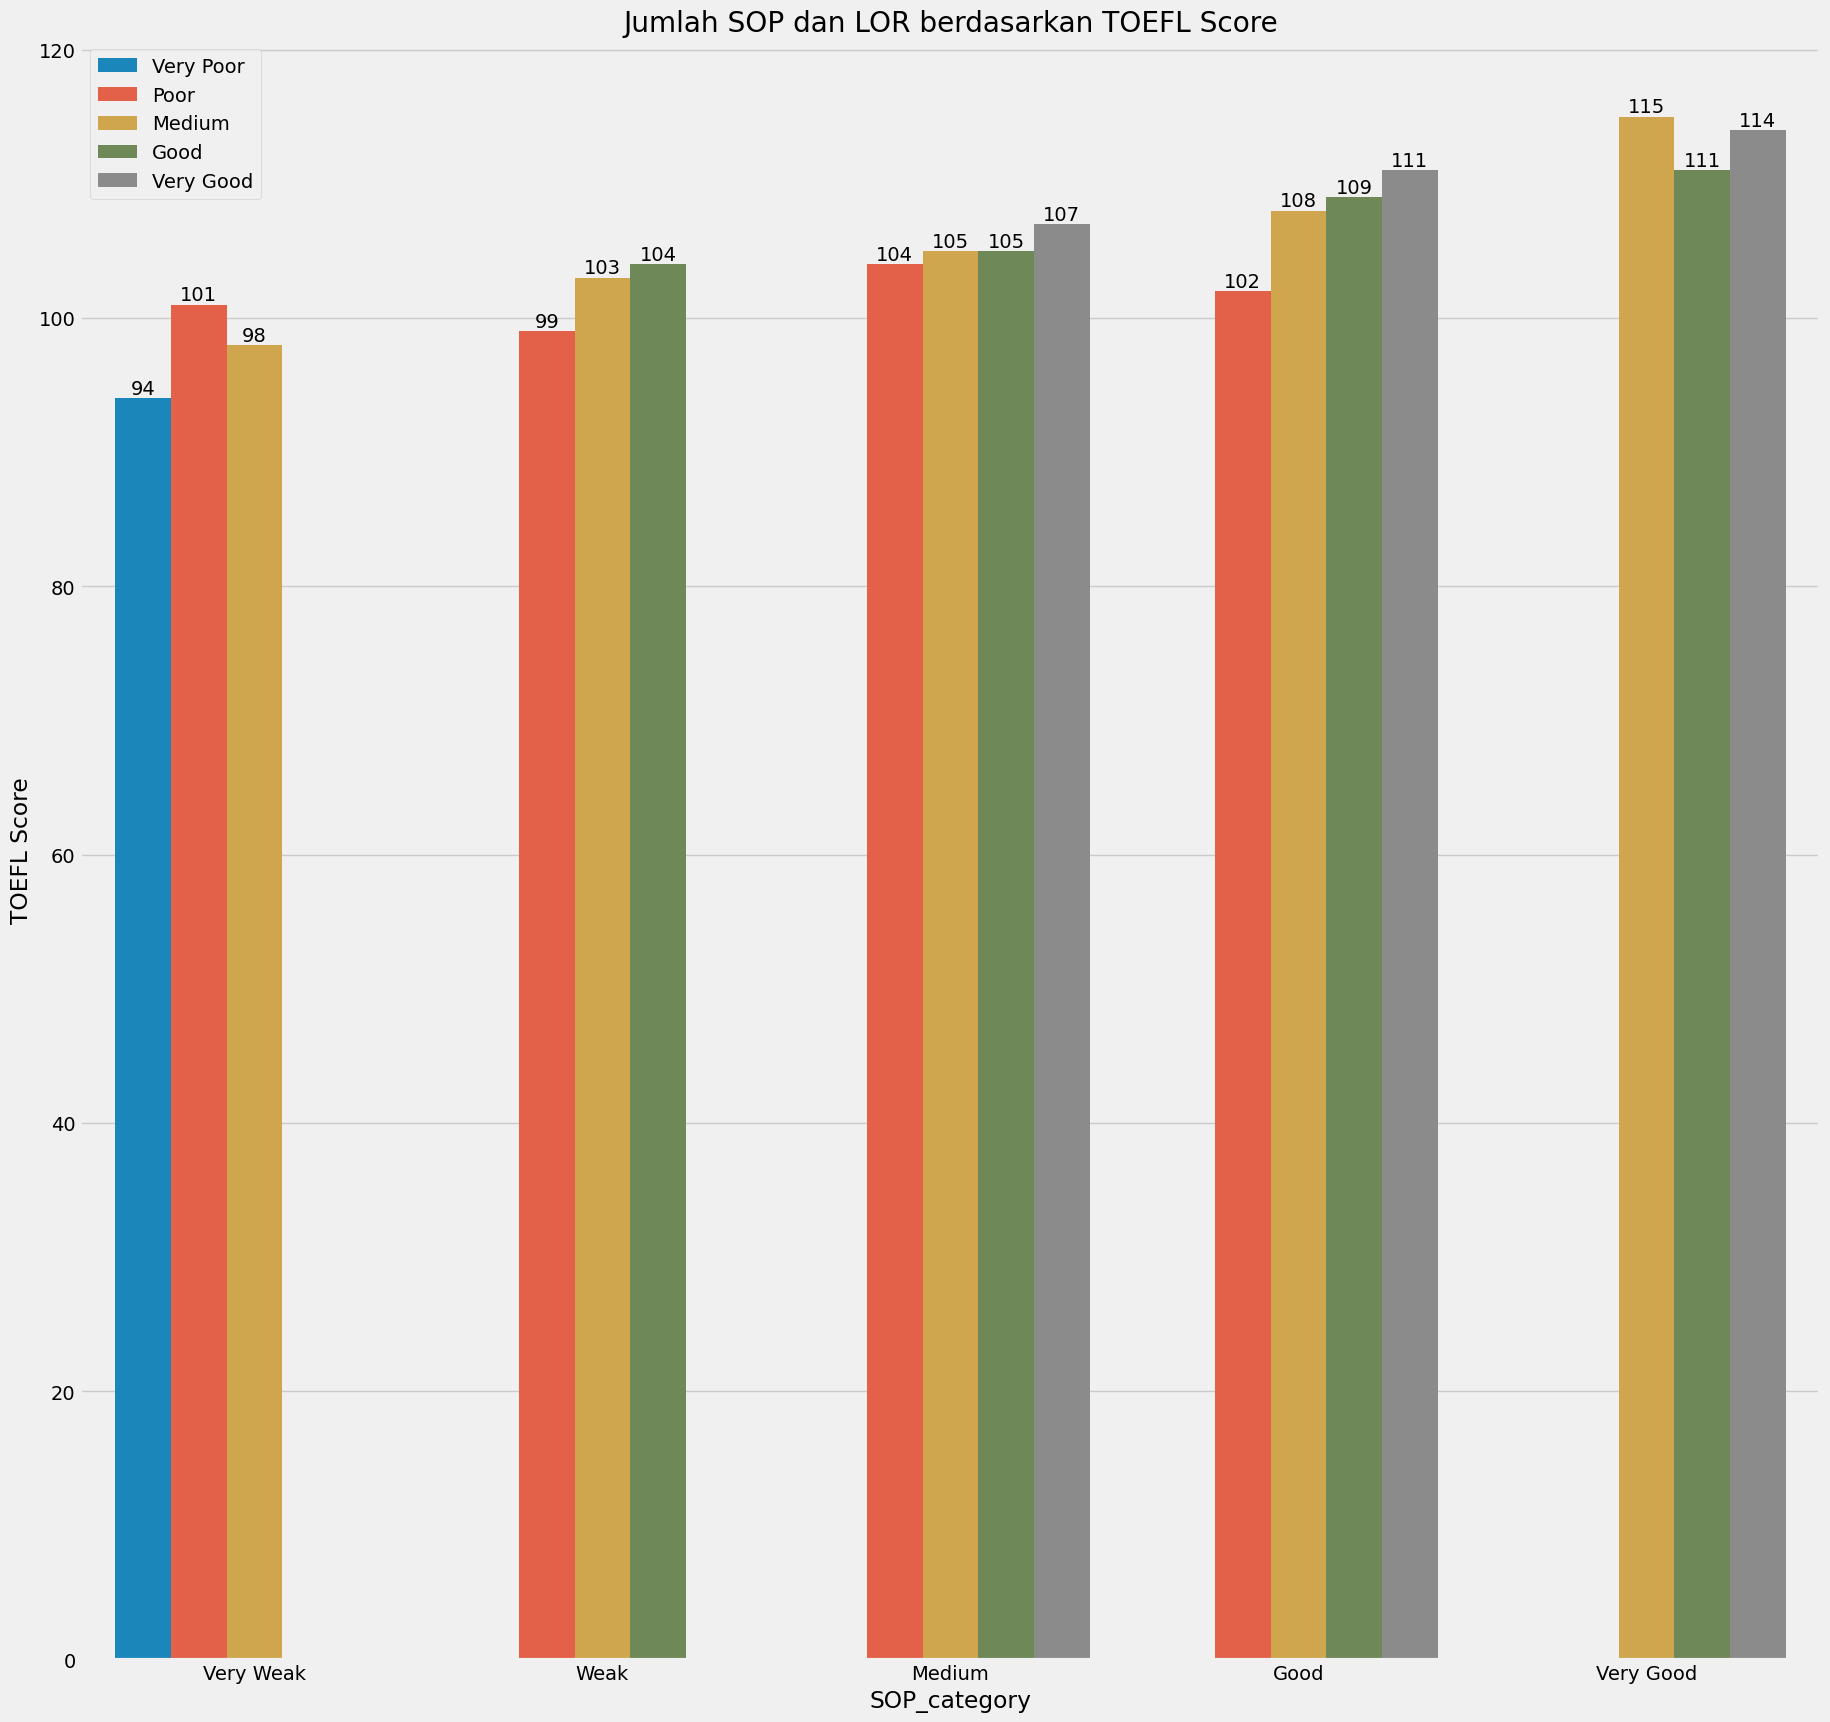

In [69]:
plt.figure(figsize=(20, 20))

a = df1.groupby(['SOP_category', 'LOR_category'])[['TOEFL Score']].mean().reset_index().sort_values(by='TOEFL Score', ascending=False)
a['TOEFL Score'] = a['TOEFL Score'].round()

p = sns.barplot(data=a, x='SOP_category', y='TOEFL Score', hue='LOR_category', ci=None)

for i in p.containers:
    p.bar_label(i)

plt.title('Jumlah SOP dan LOR berdasarkan TOEFL Score')
plt.ylabel('TOEFL Score')
plt.xlabel('SOP_category')
plt.legend(loc='upper left')
plt.show()


1. dari hasil EDA dapat diperkuat asumsi bahwa kualitas dari statement of purpose dan letter of recommendation sangat berpengaruh terhadap nilai toefl yang diperoleh oleh calon mahasiswa. Dapat diasumsikan bahwa calon mahasiswa yang memiliki statement of purpose dan letter of recommendation yang baik cenderung memiliki kemampuan bahasa Inggris yang lebih baik, sehingga mampu mendapatkan nilai toefl yang lebih tinggi. 

2. Sedangkan calon mahasiswa dengan kualitas statement of purpose yang lemah cenderung memiliki kemampuan bahasa Inggris yang kurang, sehingga nilai toefl yang diperoleh cenderung kecil. Oleh karena itu, dapat direkomendasikan kepada calon mahasiswa untuk memperbaiki kualitas statement of purpose dan letter of recommendation untuk meningkatkan kemampuan bahasa Inggris dan memperoleh nilai toefl yang lebih tinggi.

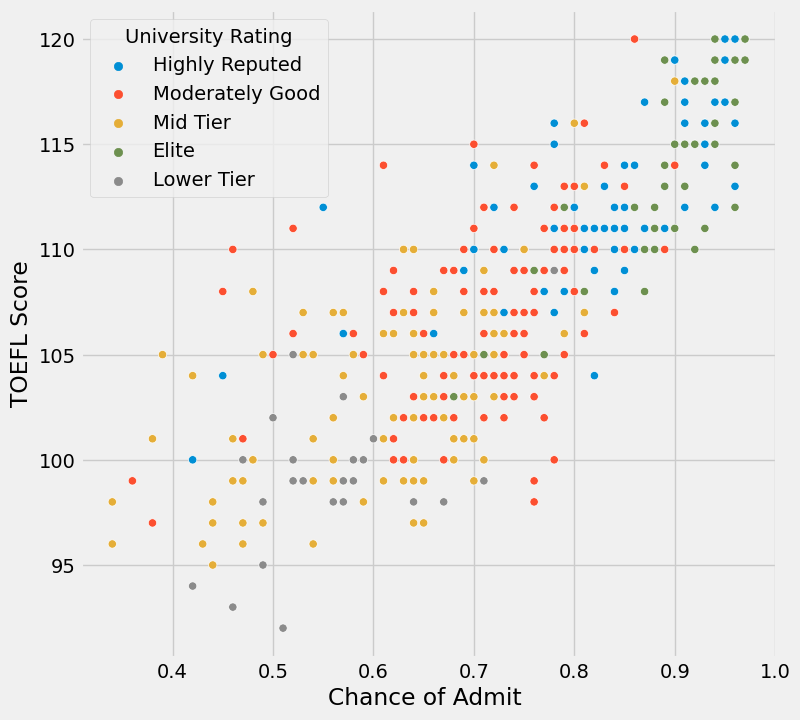

In [70]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data = df1, x='Chance of Admit ',y = 'TOEFL Score', hue = 'University Rating')
plt.show()


Semakin tinggi nilai Toefl score, semakin besar kemungkinan mahasiswa diterima di universitas tersebut.
Semakin tinggi peringkat universitas, semakin tinggi juga nilai Toefl score yang diperlukan untuk diterima.

Terdapat kecenderungan bahwa semakin tinggi peringkat universitas, semakin tinggi pula kemungkinan mahasiswa di terima di Universitas tersebut



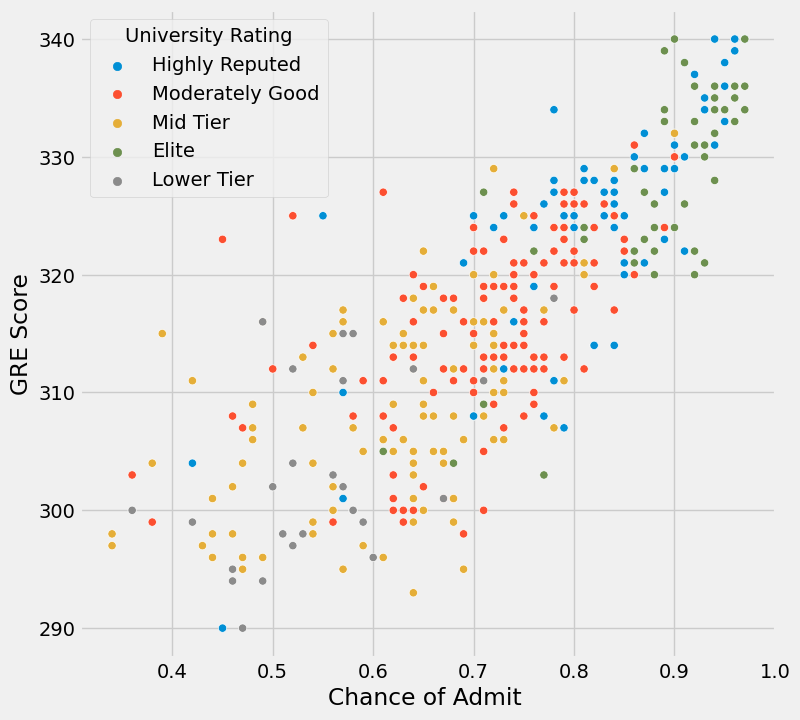

In [71]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data = df1, x='Chance of Admit ',y = 'GRE Score', hue = 'University Rating')
plt.show()


Semakin tinggi nilai GRE score, semakin besar kemungkinan mahasiswa diterima di universitas tersebut.

Semakin tinggi peringkat universitas, semakin tinggi juga nilai GRE score yang diperlukan untuk diterima.




#Train test Split

In [72]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

#Scaling

In [73]:
rs = RobustScaler()
X_train_transformed = rs.fit_transform(X_train)
X_test_transformed = rs.transform(X_test)

#Feature Selection

In [74]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

In [75]:
corr = X_train_transformed_df.corr(method = 'spearman')

<Axes: >

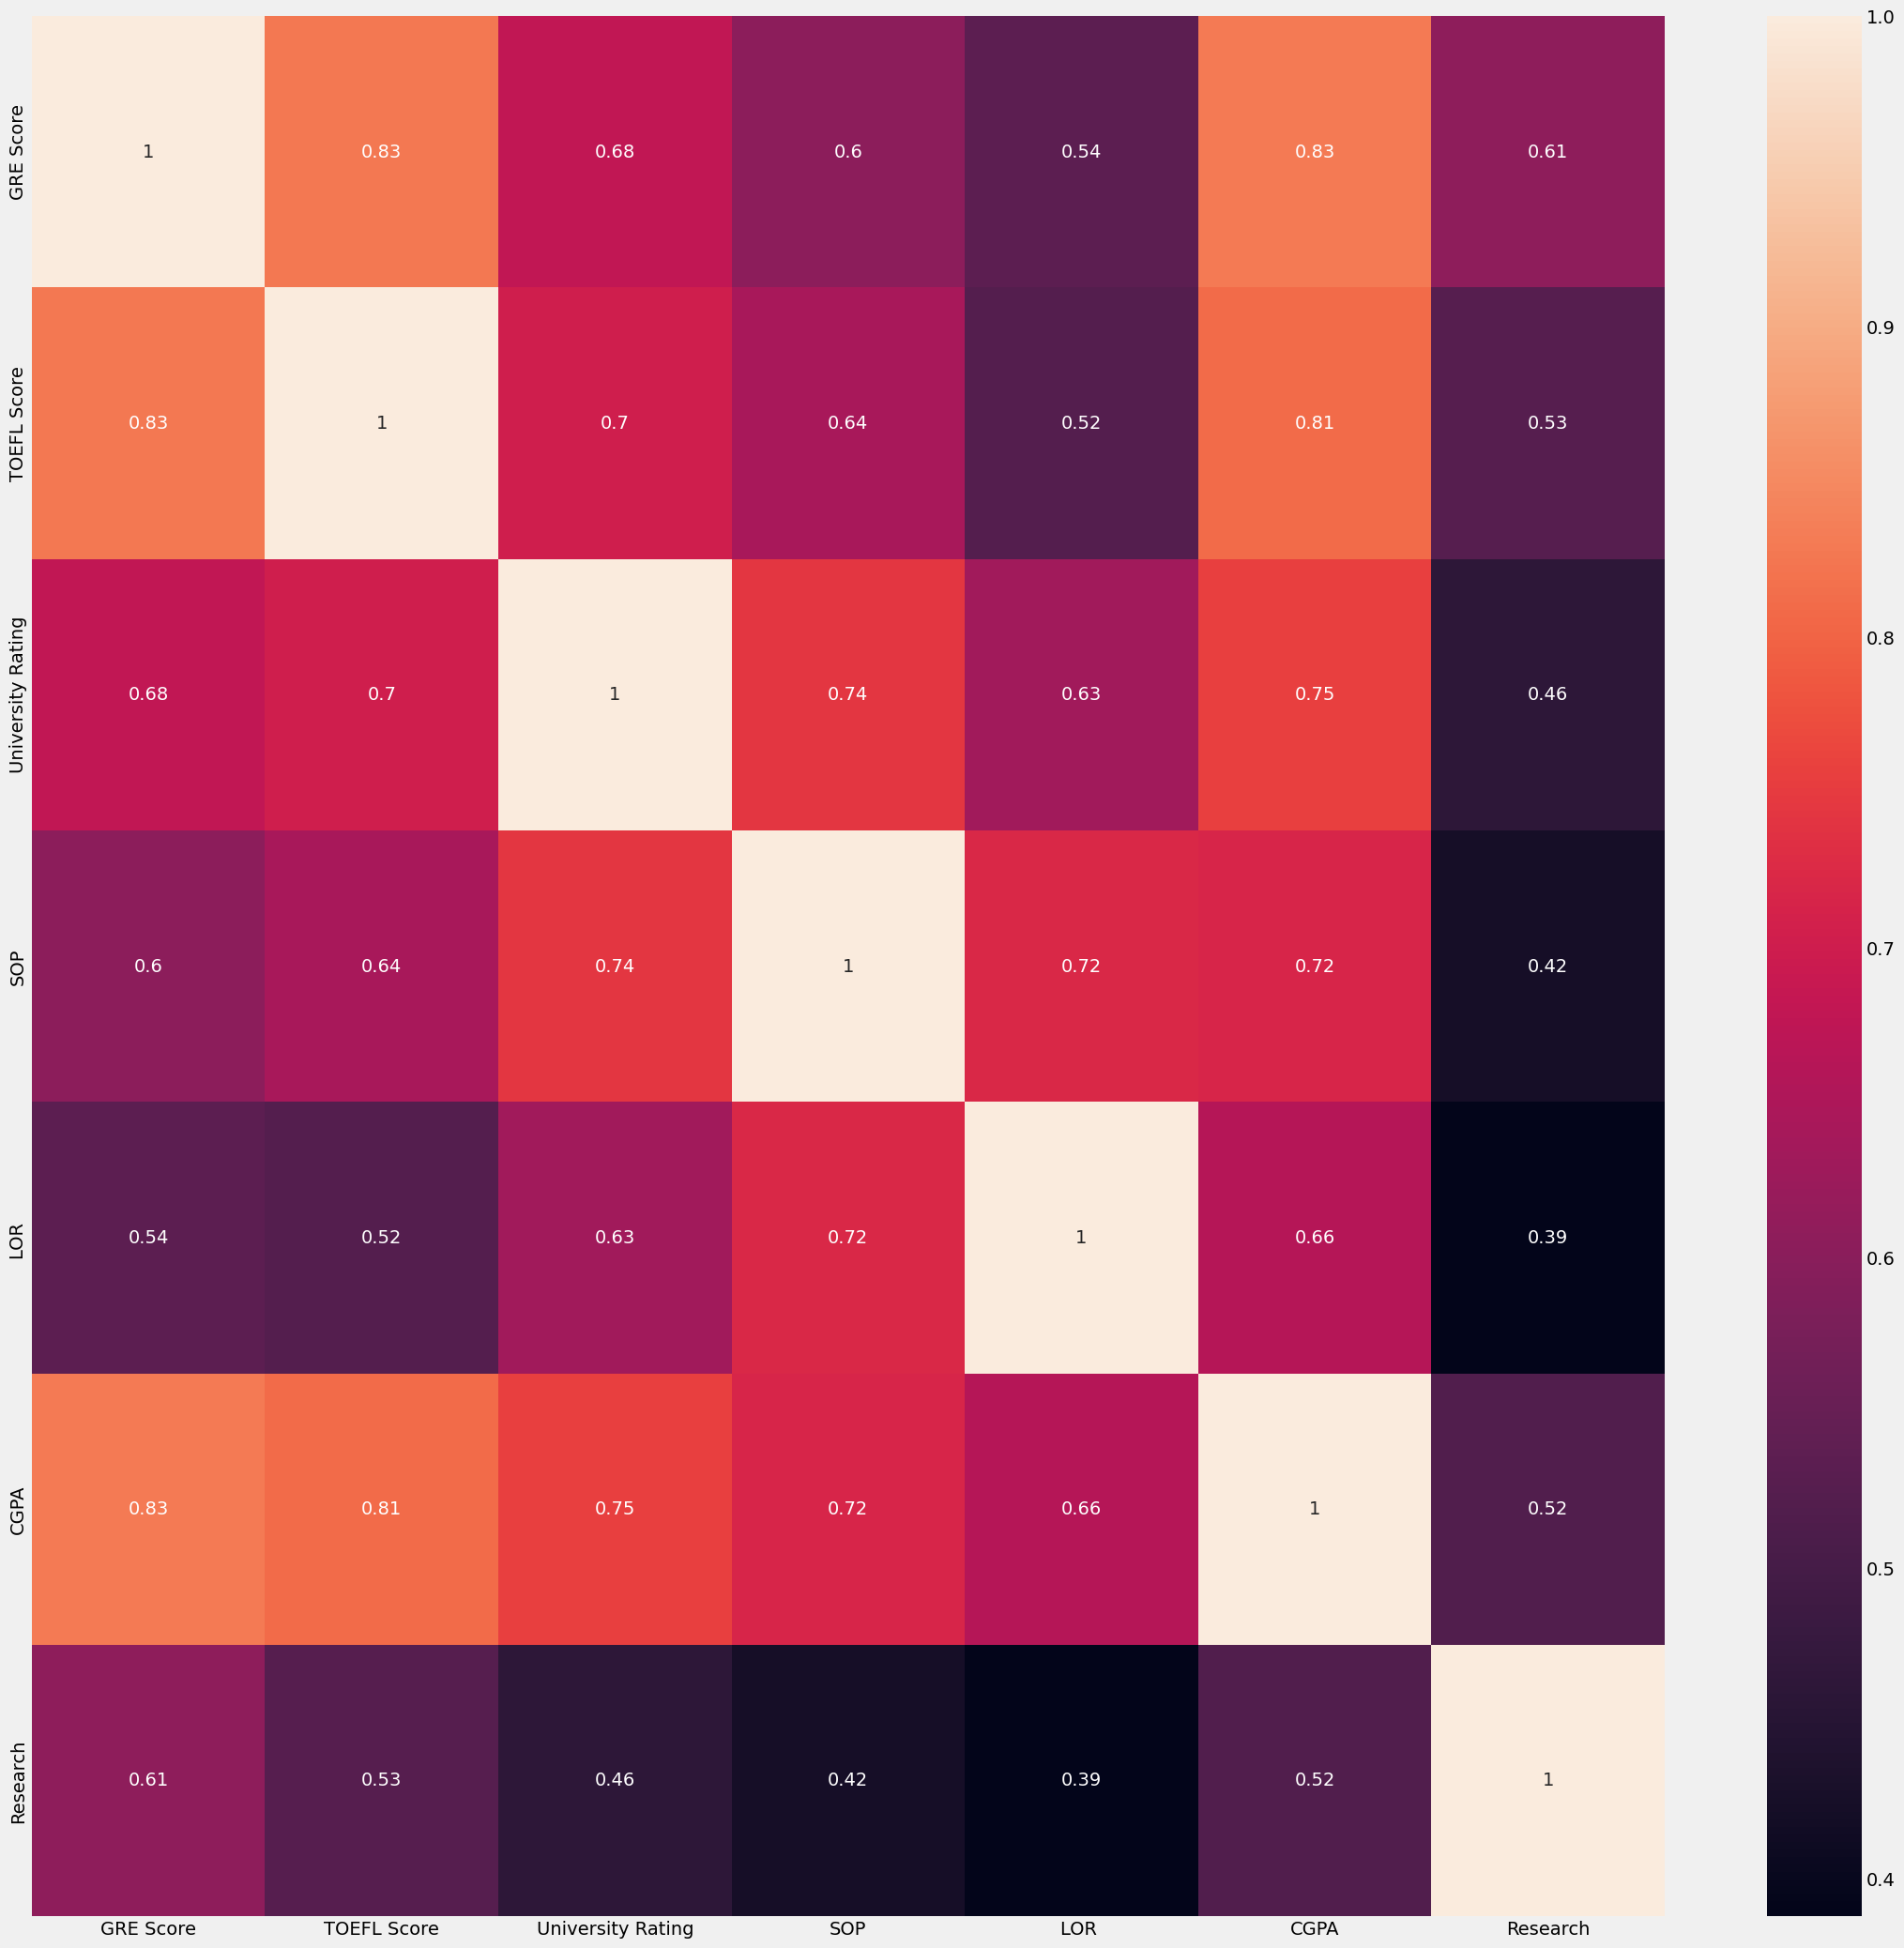

In [76]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

In [77]:
var = []
drop = []
for x in X_train_transformed_df.columns:
  for y in X_train_transformed_df.columns:
    if x != y:
      if [y,x] not in var:
        corr, p_value = spearmanr(X_train_transformed_df[x], X_train_transformed_df[y])
        var.append([x, y])
        if (corr <= -0.8) | (corr >= 0.8):
          if p_value < 0.05:
            drop.append(y)

kolom yang memiliki korelasi <= -0.8 atau korelasi >= 0.8 serta o_value <0.05 akan dihapus

In [78]:
drop

['TOEFL Score', 'CGPA', 'CGPA']

In [79]:
X_train = X_train_transformed_df.drop(drop, axis = 1)

In [80]:
X_train.shape

(320, 5)

In [81]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns =X_test.columns)

In [82]:
X_test = X_test_transformed_df.loc[:,list(X_train.columns)]

In [83]:
X_test.shape

(80, 5)

#Modeling

##GBR

Model Gradien Boosting Regresor adalah algoritma pembelajaran mesin yang menghasilkan model regresi dengan menggabungkan beberapa model pohon keputusan yang lemah dan menyeimbangkan bobotnya untuk menghasilkan prediksi yang lebih akurat.

In [84]:
gbr = GradientBoostingRegressor(random_state =42)

# Latih model menggunakan data training
gbr.fit(X_train, y_train)

# Lakukan prediksi menggunakan data testing
y_pred = gbr.predict(X_test)

In [85]:
gbr.score(X_test, y_test), gbr.score(X_train, y_train)

(0.732859258115729, 0.8643735513501103)

In [86]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = metrics.r2_score(y_test, y_pred)

print('Testing performance')
print('MAE: {:.4f}'.format(MAE))
print('MAPE: {:.4f}'.format(MAPE))
print('MSE: {:.4f}'.format(MSE))
print('RMSE: {:.4f}'.format(RMSE))
print('R_Squared: {:.4f}'.format(R_Squared))


Testing performance
MAE: 0.0595
MAPE: 0.1040
MSE: 0.0069
RMSE: 0.0831
R_Squared: 0.7329


1. MAE (Mean Absolute Error): 0.0595
MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai aktual. Nilai MAE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

2. MAPE (Mean Absolute Percentage Error): 0.1040
MAPE adalah rata-rata persentase selisih absolut antara prediksi dan nilai aktual. Nilai MAPE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

3. MSE (Mean Squared Error): 0.0069
MSE adalah rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

4. RMSE (Root Mean Squared Error): 0.0831
RMSE adalah akar kuadrat dari MSE. Nilai RMSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

5. R_Squared: 0.7329
R_Squared adalah koefisien determinasi yang menunjukkan seberapa baik model cocok dengan data aktual. Nilai R_Squared antara 0 dan 1, dan semakin dekat dengan 1, semakin baik model cocok dengan data aktual. Nilai R_Squared 0,7329 menunjukkan bahwa model mampu menjelaskan 73,29% variabilitas data aktual.


##Random Forest Regresor

Model Random Forest Regresor adalah algoritma pembelajaran mesin yang menghasilkan model regresi dengan menggabungkan beberapa model pohon keputusan yang acak dan menyeimbangkan bobotnya untuk menghasilkan prediksi yang lebih akurat.

In [87]:

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Evaluate model performance
y_pred2 = rf_reg.predict(X_test)


In [88]:
rf_reg.score(X_test, y_test), rf_reg.score(X_train, y_train)

(0.7189830177151659, 0.9476566128920376)

In [89]:
from sklearn import metrics

MAE2 = metrics.mean_absolute_error(y_test, y_pred2)
MAPE2 = metrics.mean_absolute_percentage_error(y_test, y_pred2)
MSE2 = metrics.mean_squared_error(y_test, y_pred2)
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
R_Squared2 = metrics.r2_score(y_test, y_pred2)

print('Testing performance')
print('MAE: {:.4f}'.format(MAE2))
print('MAPE: {:.4f}'.format(MAPE2))
print('MSE: {:.4f}'.format(MSE2))
print('RMSE: {:.4f}'.format(RMSE2))
print('R_Squared: {:.4f}'.format(R_Squared2))


Testing performance
MAE: 0.0585
MAPE: 0.1033
MSE: 0.0073
RMSE: 0.0852
R_Squared: 0.7190


1. MAE (Mean Absolute Error): 0.0585
MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai aktual. Nilai MAE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

2. MAPE (Mean Absolute Percentage Error): 0.1033
MAPE adalah rata-rata persentase selisih absolut antara prediksi dan nilai aktual. Nilai MAPE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

3. MSE (Mean Squared Error): 0.0073
MSE adalah rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

4. RMSE (Root Mean Squared Error): 0.0852
RMSE adalah akar kuadrat dari MSE. Nilai RMSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

5. R_Squared: 0.7190
R_Squared adalah koefisien determinasi yang menunjukkan seberapa baik model cocok dengan data aktual. Nilai R_Squared antara 0 dan 1, dan semakin dekat dengan 1, semakin baik model cocok dengan data aktual. Nilai R_Squared 0,7190 menunjukkan bahwa model mampu menjelaskan 71,90% variabilitas data aktual.

## Decision Tree Regresor

Model Decision Tree Regresor adalah algoritma pembelajaran mesin yang menghasilkan model regresi berbasis pohon keputusan dengan membagi dataset menjadi beberapa bagian kecil yang semakin spesifik.

In [90]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Evaluate model performance
y_pred3 = dt_reg.predict(X_test)

In [91]:
dt_reg.score(X_test, y_test), dt_reg.score(X_train, y_train)

(0.4848535271178287, 0.9925063901265557)

In [92]:
from sklearn import metrics

MAE3 = metrics.mean_absolute_error(y_test, y_pred3)
MAPE3 = metrics.mean_absolute_percentage_error(y_test, y_pred3)
MSE3 = metrics.mean_squared_error(y_test, y_pred3)
RMSE3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
R_Squared3 = metrics.r2_score(y_test, y_pred3)

print('Testing performance')
print('MAE: {:.4f}'.format(MAE3))
print('MAPE: {:.4f}'.format(MAPE3))
print('MSE: {:.4f}'.format(MSE3))
print('RMSE: {:.4f}'.format(RMSE3))
print('R_Squared: {:.4f}'.format(R_Squared3))


Testing performance
MAE: 0.0787
MAPE: 0.1349
MSE: 0.0133
RMSE: 0.1153
R_Squared: 0.4849


1. MAE (Mean Absolute Error): 0.0787
MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai aktual. Nilai MAE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

2. MAPE (Mean Absolute Percentage Error): 0.1349
MAPE adalah rata-rata persentase selisih absolut antara prediksi dan nilai aktual. Nilai MAPE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

3. MSE (Mean Squared Error): 0.0133
MSE adalah rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

4. RMSE (Root Mean Squared Error): 0.1153
RMSE adalah akar kuadrat dari MSE. Nilai RMSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

5. R_Squared: 0.4849
R_Squared adalah koefisien determinasi yang menunjukkan seberapa baik model cocok dengan data aktual. Nilai R_Squared antara 0 dan 1, dan semakin dekat dengan 1, semakin baik model cocok dengan data aktual. Nilai R_Squared 0,4849 menunjukkan bahwa model hanya mampu menjelaskan 48,49% variabilitas data aktual.

##Linear Regresi

Model Linear Regression adalah algoritma pembelajaran mesin yang menghasilkan model regresi linear dengan menentukan hubungan linier antara variabel input dan output.

In [93]:
#Membuat objek LinearRegression yang akan digunakan untuk melakukan training pada data
lin = LinearRegression()

#Melatih model regresi linear menggunakan data yang sudah dipisahkan menjadi data training, yaitu X_train (features) dan y_train (target variable).
lin.fit(X_train, y_train)

#Memprediksi nilai target variable (y) pada data testing (X_test) menggunakan model yang sudah dilatih sebelumnya.
y_pred4 = lin.predict(X_test)

In [94]:
lin.score(X_test, y_test), lin.score(X_train, y_train)

(0.745734131967331, 0.7336446982306013)

In [95]:
from sklearn import metrics

MAE4 = metrics.mean_absolute_error(y_test, y_pred4)
MAPE4 = metrics.mean_absolute_percentage_error(y_test, y_pred4)
MSE4 = metrics.mean_squared_error(y_test, y_pred4)
RMSE4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred4))
R_Squared4 = metrics.r2_score(y_test, y_pred4)

print('Testing performance')
print('MAE: {:.4f}'.format(MAE4))
print('MAPE: {:.4f}'.format(MAPE4))
print('MSE: {:.4f}'.format(MSE4))
print('RMSE: {:.4f}'.format(RMSE4))
print('R_Squared: {:.4f}'.format(R_Squared4))


Testing performance
MAE: 0.0592
MAPE: 0.1026
MSE: 0.0066
RMSE: 0.0810
R_Squared: 0.7457


MAE (Mean Absolute Error): 0.0592
MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai aktual. Nilai MAE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

MAPE (Mean Absolute Percentage Error): 0.1026
MAPE adalah rata-rata persentase selisih absolut antara prediksi dan nilai aktual. Nilai MAPE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

MSE (Mean Squared Error): 0.0066
MSE adalah rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

RMSE (Root Mean Squared Error): 0.0810
RMSE adalah akar kuadrat dari MSE. Nilai RMSE yang lebih rendah menunjukkan bahwa model lebih akurat dalam memprediksi nilai aktual.

R_Squared: 0.7457
R_Squared adalah koefisien determinasi yang menunjukkan seberapa baik model cocok dengan data aktual. Nilai R_Squared antara 0 dan 1, dan semakin dekat dengan 1, semakin baik model cocok dengan data aktual. Nilai R_Squared 0,7457 menunjukkan bahwa model mampu menjelaskan sekitar 74,57% variabilitas data aktual.

#Crossvalidation

In [96]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False]}

In [97]:
grid_search = GridSearchCV(estimator=lin, param_grid=param_grid, cv=5, n_jobs=-1) 

In [98]:
grid_search.fit(X_train, y_train)
#jangan di run lagi training nya setengah jam

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'positive': [True, False]})

In [99]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best score: 0.715800382252929


In [100]:
#Membuat objek LinearRegression yang akan digunakan untuk melakukan training pada data
lin2 = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = True)

#Melatih model regresi linear menggunakan data yang sudah dipisahkan menjadi data training, yaitu X_train (features) dan y_train (target variable).
lin2.fit(X_train, y_train)

#Memprediksi nilai target variable (y) pada data testing (X_test) menggunakan model yang sudah dilatih sebelumnya.
y_pred5 = lin2.predict(X_test)

In [101]:
lin2.score(X_test, y_test), lin2.score(X_train, y_train)

(0.745734131967331, 0.7336446982306013)

In [102]:
MAE5 = metrics.mean_absolute_error(y_test, y_pred5)
MAPE5 = metrics.mean_absolute_percentage_error(y_test, y_pred5)
MSE5 = metrics.mean_squared_error(y_test, y_pred5)
RMSE5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred5))
R_Squared5 = metrics.r2_score(y_test, y_pred5)

print('test Akurasi setelah Grid Search CV')
print('MAE: {:.4f}'.format(MAE5))
print('MAPE: {:.4f}'.format(MAPE5))
print('MSE: {:.4f}'.format(MSE5))
print('RMSE: {:.4f}'.format(RMSE5))
print('R-Squared: {:.4f}'.format(R_Squared5))


test Akurasi setelah Grid Search CV
MAE: 0.0592
MAPE: 0.1026
MSE: 0.0066
RMSE: 0.0810
R-Squared: 0.7457


#Feature Importance

Feature: GRE Score, Score: 0.09693
Feature: University Rating, Score: 0.04313
Feature: LOR , Score: 0.02643
Feature: Research, Score: 0.01960
Feature: SOP, Score: 0.01673


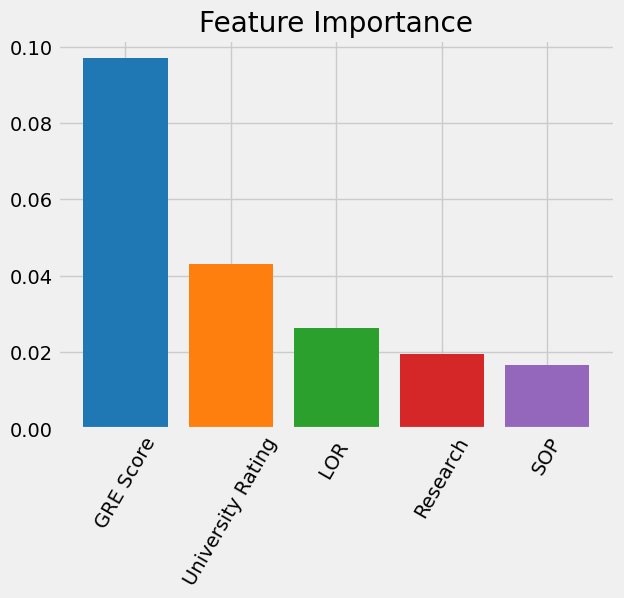

In [103]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# get feature importance (based on coefficient magnitude)
importance = abs(lin2.coef_)

# create a dictionary to store feature importance order
feature_dict = {}

# populate the dictionary with feature importance values
for i, v in enumerate(importance):
    feature_dict[X_train.columns[i]] = v

# sort the dictionary by feature importance (from highest to lowest)
sorted_feature_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

# display feature importance order
for k, v in sorted_feature_dict.items():
    print(f"Feature: {k}, Score: {v:.5f}")

# create a bar plot for feature importance, following the sorted order
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(range(len(importance)), [sorted_feature_dict[k] for k in sorted_feature_dict.keys()], color=colors)

# set x-axis labels based on the sorted feature importance, rotated by 60 degrees
plt.xticks(range(len(importance)), [k for k in sorted_feature_dict.keys()], rotation=60)
plt. title('Feature Importance')
plt.show()


Dari hasil pengukuran feature importance tersebut, dapat diinterpretasikan bahwa fitur "GRE Score" memiliki kontribusi paling besar dalam membuat prediksi pada model machine learning tersebut. Fitur "University Rating" dan "LOR" juga memiliki kontribusi yang cukup signifikan, meskipun tidak sebesar "GRE Score". Sedangkan, fitur "Research" dan "SOP" memiliki kontribusi yang lebih rendah dalam membuat prediksi pada model tersebut.

Dalam konteks aplikasi yang lebih spesifik, hasil ini dapat memberikan panduan tentang fitur mana yang perlu diberikan perhatian lebih dalam memprediksi variabel target. Sebagai contoh, dalam aplikasi penerimaan mahasiswa ke program pascasarjana, hasil ini dapat menunjukkan bahwa nilai "GRE Score" memiliki pengaruh yang lebih besar daripada fitur lainnya, dan oleh karena itu dapat menjadi fokus utama dalam meningkatkan peluang diterima ke program tersebut.

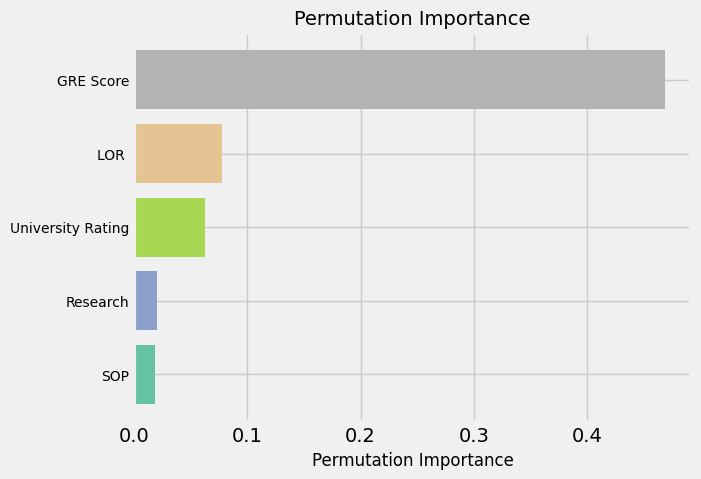

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

result = permutation_importance(lin2, X_test, y_test, n_repeats=10, random_state=42)

# Urutkan fitur berdasarkan pengaruhnya
sorted_idx = result.importances_mean.argsort()

# Tentukan warna untuk setiap bar
colors = plt.cm.Set2(np.linspace(0, 1, len(sorted_idx)))

# Plot bar chart
fig, ax = plt.subplots()
ax.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx], color=colors)

# Tentukan label untuk sumbu-y dan atur ukuran font
ax.set_yticks(range(X_test.shape[1]))
ax.set_yticklabels(X_test.columns[sorted_idx], fontsize=10)

# Atur label untuk sumbu-x dan atur ukuran font
ax.set_xlabel('Permutation Importance', fontsize=12)

# Atur judul plot dan atur ukuran font
ax.set_title('Permutation Importance', fontsize=14)

# Tampilkan plot
plt.show()


Dari hasil pengukuran permutation importance tersebut, dapat diinterpretasikan bahwa fitur "GRE Score" memiliki pengaruh paling besar dalam membuat prediksi pada model machine learning tersebut. Hasil ini menunjukkan bahwa dengan mempertahankan fitur "GRE Score" pada nilai aslinya, model dapat menghasilkan prediksi yang lebih akurat daripada ketika fitur tersebut dipermutasi secara acak.

Selanjutnya, fitur "LOR" dan "University Rating" juga memiliki pengaruh yang cukup signifikan dalam membuat prediksi pada model tersebut, meskipun tidak sebesar "GRE Score". Sedangkan, fitur "Research" dan "SOP" memiliki pengaruh yang lebih rendah dalam membuat prediksi pada model tersebut.

Dalam konteks aplikasi yang lebih spesifik, hasil ini dapat memberikan panduan tentang fitur mana yang perlu diberikan perhatian lebih dalam memprediksi variabel target. Sebagai contoh, hasil ini dapat menunjukkan bahwa fitur "GRE Score" sangat penting dalam memprediksi variabel target, dan perbaikan pada nilai fitur ini dapat meningkatkan kinerja model secara signifikan. Sedangkan, fitur "Research" dan "SOP" mungkin tidak terlalu penting dan dapat diabaikan dalam memprediksi variabel target.

#Perbandingan

In [105]:
eval = pd.DataFrame()
eval['Metrics'] = ['MAE', 'MAPE', 'MSE', 'RMSE','R_Squared']
eval['GBR'] = [MAE, MAPE, MSE, RMSE,R_Squared]
eval['Random Forest'] = [MAE2, MAPE2, MSE2, RMSE2,R_Squared2 ]
eval['Decision Tree'] = [MAE3, MAPE3, MSE3, RMSE3,R_Squared3 ]
eval['Linear Regresi'] = [MAE4, MAPE4, MSE4, RMSE4,R_Squared4 ]
eval['LR Grid  CV'] = [MAE5, MAPE5, MSE5, RMSE5,R_Squared5 ]

eval.set_index('Metrics')

,GBR,Random Forest,Decision Tree,Linear Regresi,LR Grid CV
Metrics,,,,,
MAE,0.059545,0.058537,0.078687,0.059214,0.059214
MAPE,0.103960,0.103299,0.134881,0.102598,0.102598
MSE,0.006898,0.007257,0.013303,0.006566,0.006566
RMSE,0.083057,0.085187,0.115338,0.081031,0.081031
R_Squared,0.732859,0.718983,0.484854,0.745734,0.745734


Berdasarkan hasil di atas, dapat disimpulkan bahwa model Linear Regresi memiliki performa terbaik dalam memprediksi data, diikuti oleh Gradient boosting regresor dan Random Forest Regressor. Model Decision Tree Regressor kurang cocok untuk data dengan hubungan linier, dan LR Grid CV memberikan hasil yang sama dengan model Linear Regression.

#StatsModels

In [106]:
import statsmodels.api as sm

# pastikan y_train berupa vektor kolom
y_train = y_train.values.reshape(-1, 1)

# pastikan X_train dan y_train memiliki jumlah baris yang sama
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("Jumlah baris X_train dan y_train tidak sama")

# tambahkan konstanta pada X_train
X_train = sm.add_constant(X_train)

# fit model OLS
results = sm.OLS(y_train, X_train).fit()

# tampilkan hasil summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.92e-88
Time:                        16:08:24   Log-Likelihood:                 392.60
No. Observations:                 320   AIC:                            -773.2
Df Residuals:                     314   BIC:                            -750.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7366      0.00

Berdasarkan hasil di atas, variabel GRE Score, University Rating, LOR, dan Research memiliki p-value yang kurang dari 0.05, sehingga dapat dianggap signifikan terhadap variabel target. Hal ini menunjukkan bahwa variabel-variabel tersebut memengaruhi variabel target dengan signifikan.

Sedangkan variabel SOP memiliki p-value yang lebih besar dari 0.05, sehingga tidak signifikan terhadap variabel target. Variabel SOP tidak memiliki pengaruh yang signifikan terhadap variabel target dalam model tersebut.



<Axes: ylabel='Density'>

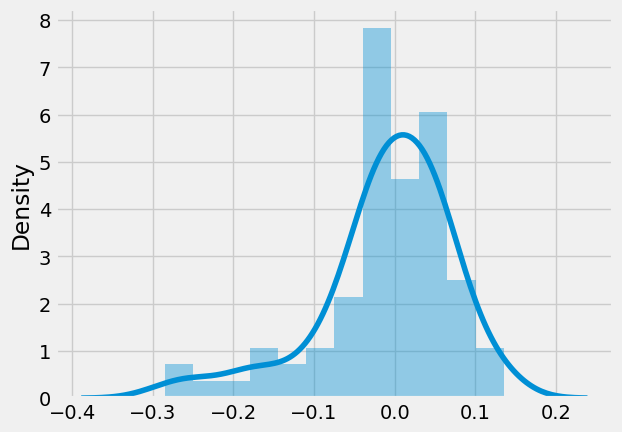

In [107]:
y_hat = (y_pred)
sns.distplot(list((y_test) - y_hat),kde=True)

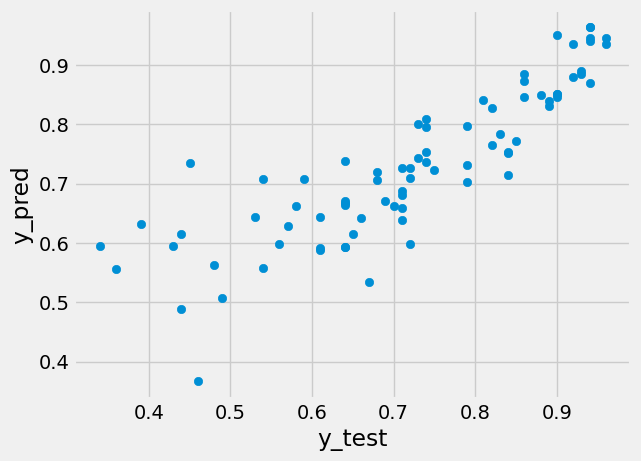

In [108]:
plt.scatter (y_test, y_hat)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()